<a href="https://colab.research.google.com/github/hanadinh1203/Data-Analytics-/blob/main/Clusters_%26_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/My Drive/Griffith Study/Udemy & Coursera study/Fraud & Risk with AI/clusters+and+outliers.csv')
df

,Number of Transactions,Transaction Amount,Transaction Duration
0,14,955,54
1,7,252,69
2,2,769,63
3,5,336,16
4,13,1063,6
...,...,...,...
95,5,716,38
96,14,949,2
97,6,519,77
98,6,559,36


In [10]:
def detect_cluster_outliers(df, n_clusters=4, z_threshold=2):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(df.iloc[:, :-1])

    # Initialize an empty DataFrame to hold outliers
    outliers = pd.DataFrame()

    # Calculate the Z-score and detect outliers for each cluster
    for cluster in range(n_clusters):
        # Extract the data points belonging to the current cluster
        cluster_data = df[df['cluster'] == cluster].copy()

        # Compute the Z-scores for each data point in the cluster
        z_scores = cluster_data.apply(zscore)

        # An outlier will have a Z-score above the threshold in any feature
        cluster_data['outlier'] = (np.abs(z_scores) > z_threshold).any(axis=1)

        # Append the outliers to the outliers DataFrame
        outliers = pd.concat([outliers, cluster_data[cluster_data['outlier']]], ignore_index=True)

    # Drop the temporary 'outlier' column
    outliers.drop('outlier', axis=1, inplace=True)

    return outliers

# Function calling
outliers = detect_cluster_outliers(df)

# Printing the outlier record
if len(outliers) > 0:
    print("Outliers detected:")
    print(outliers)
else:
    print("No outliers detected.")

# Calculate the mean or median values of each factor within each cluster
cluster_characteristics_mean = df.groupby('cluster').mean()
cluster_characteristics_median = df.groupby('cluster').median()

# Print the cluster characteristics
print("Cluster characteristics (mean values):")
print(cluster_characteristics_mean)
print(outliers)
print("\nCluster characteristics (median values):")
print(cluster_characteristics_median)
print(outliers)

Outliers detected:
   Number of Transactions  Transaction Amount  Transaction Duration  cluster
0                      15                 496                    73        3
Cluster characteristics (mean values):
         Number of Transactions  Transaction Amount  Transaction Duration
cluster                                                                  
0                      7.272727          711.090909             41.590909
1                      7.680000          217.160000             48.080000
2                      7.481481          970.962963             48.185185
3                      8.230769          446.307692             47.807692
   Number of Transactions  Transaction Amount  Transaction Duration  cluster
0                      15                 496                    73        3

Cluster characteristics (median values):
         Number of Transactions  Transaction Amount  Transaction Duration
cluster                                                                  


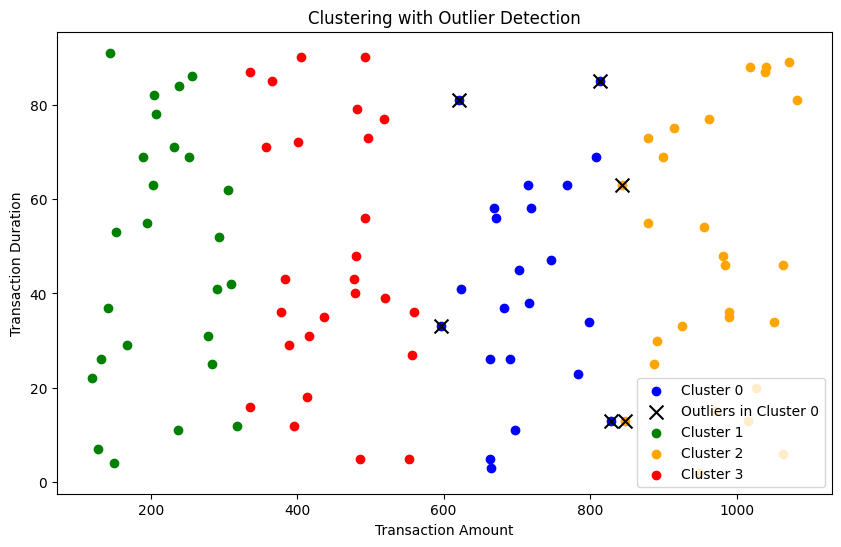

In [12]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Transaction Amount', 'Transaction Duration']])

# Calculate Z-scores for each feature within each cluster
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    z_scores = cluster_data[['Transaction Amount', 'Transaction Duration']].apply(zscore)
    df.loc[cluster_data.index, 'Outlier'] = (np.abs(z_scores) > 1.7).any(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Transaction Amount'], cluster_data['Transaction Duration'], c=colors[cluster], label=f'Cluster {cluster}')

    # Highlighting outliers
    outliers = cluster_data[cluster_data['Outlier']]
    plt.scatter(outliers['Transaction Amount'], outliers['Transaction Duration'], c='black', marker='x', s=100, label=f'Outliers in Cluster {cluster}' if cluster == 0 else '')

plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Duration')
plt.title('Clustering with Outlier Detection')
plt.legend()
plt.show()